<a href="https://colab.research.google.com/github/YNNJN/ML_Bigdata/blob/master/9_CNN%20%EA%B5%AC%EC%A1%B0%EC%99%80%20%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/YNNJN/ML_Bigdata.git

Cloning into 'ML_Bigdata'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 69 (delta 29), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [0]:
!ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Mar 18 16:23 sample_data
drwxr-xr-x 3 root root 4096 Mar 28 14:02 ML_Bigdata


In [0]:
from google.colab import drive
drive.mount('/content/MLTutorial')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MLTutorial


# 합성곱 신경망
- 인공신경망이 다시 주목받는 데 큰 역할
- 기존의 인공신경망으로 해결하지 못하던 문제를 어떤 방식으로 극복했는지?
- 합성곱 연산과정, 풀링, 패딩 및 일반적 모델 구조 -> 구현하여 성능 확인

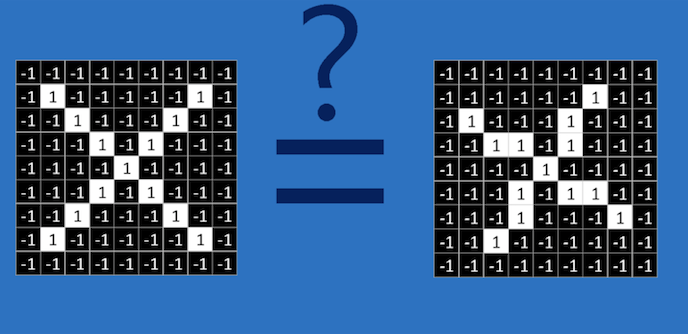

- 사람이 보기에 그냥 X와 기울어진 X
- 컴퓨터가 인식하기에는? 전혀 다른 값으로 인식됨


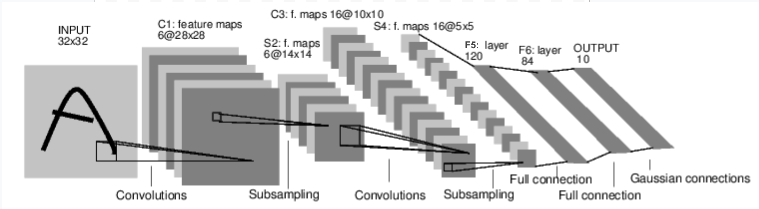

- 동물의 시각 뉴런에 대한 연구가 이루어졌고, 합성곱 신경망(CNN)이 탄생
    - 국소적인 영역을 보고 단순한 패턴에 자극을 받는 단순 세포
    - 넓은 영역을 보고 복잡한 패턴에 자극을 받는 복잡 세포
    - 이 둘이 레이어를 이루고 있다는 관찰



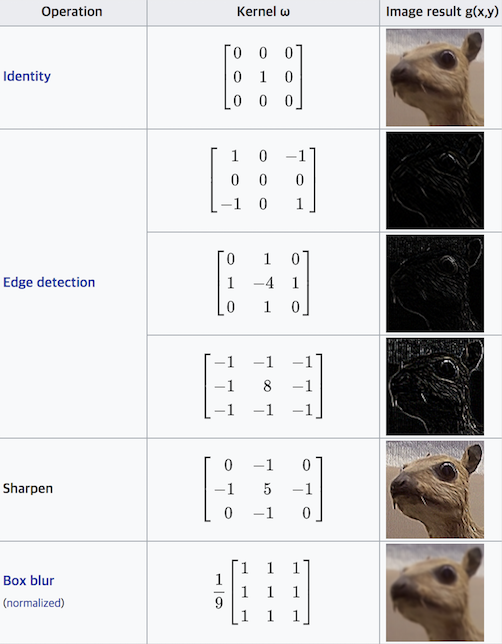

- 경계선에 대한 정보를 강조해서 보여주는 필터 적용
- 이미지에서 지정한 방향으로 깊이감을 강조해주는 필터 적용
- 입력단과 은닉층 사이 이러한 필터가 지정한 개수만큼 학습되고, 이를 통해 다양한 특징들을 뽑아내 다음 층으로 전달 가능
- 필터를 통해 뽑아낸 특성들이 중첩됨에 따라 모델은 더 복잡하고 다양한 형태를 구분할 수 있게 됨

그 전에 Review!

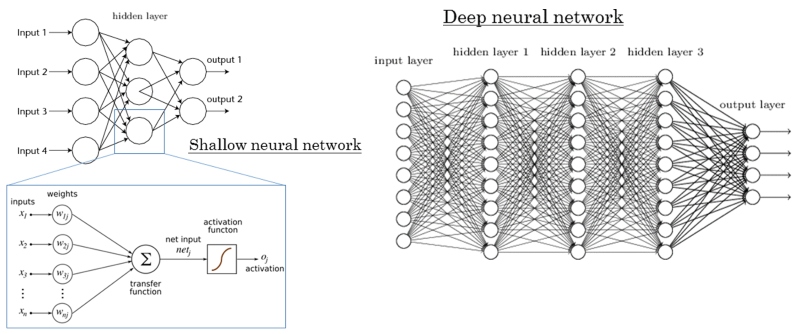

- 그동안 뉴럴넷의 한 컴포넌트부터 단일층, 다층 신경망까지 만들어봤음
- 계속 층을 쌓아나가 Deep neural network 까지 확장할 수 있음
- 그리고 우리가 여기까지 오는 동안 부딪혔던 세 가지 문제
    - Underfitting
    - Slow
    - Overfitting
- 이를 차근차근 해결해왔고 할 거야
    - Underfitting
        - activation 함수로 sigmoid 함수를 썼을 때의 문제, Vanishing gradient 현상
        - 레이어가 깊을수록 업데이트가 사라져가..... 그래서 fitting이 잘 안 됨
        - **=> 죽지 않는 활성화함수, ReLU를 쓰자! (Q1)**
            - 양의 구간에서 전부 미분값이 1로 있음
            - 끝까지 값이 전달이 잘 되고 위치도 알아서 고침
    - Slow
        - 기존의 Gradient Descent가 너무 느린 문제, SGD 제안
            - mini-batch만큼 한 스텝씩 나아감
            - 느린 완벽보다 빠르고 적절한 꼼꼼을 추구
            - 조금 헤맸어도 어쨌든 목적지에 빠르게 도달할 수 있음
            - 더 나아가 더 좋은 방향(Weight Initialization)으로, 더 적절한 보폭(Learning rate)으로 갈 순 없을까?
            - 그래서 등장한 optimizer들

    - Overfitting
        - Early Stopping, Dropout, Regularization, Data Augumentation, Batch Norm
            



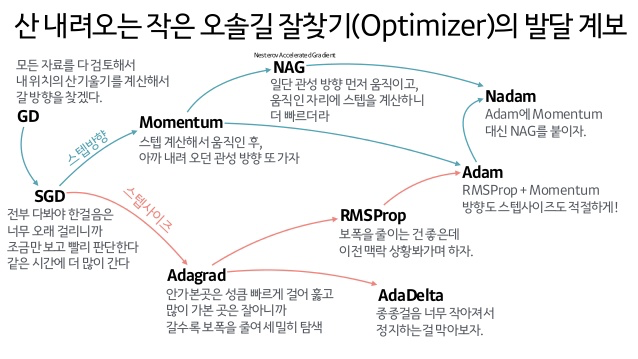

- 특히 **자주 쓰이는 Optimizer, Adam (Q2)**
- Adam에 이르기까지의 optimizer도 살펴보면 (Adagrad - RMSProp - Adam, Momentum - Adam)
    - Adagrad
        - 변수를 업데이트 할 때마다 각 변수마다 step size를 다르게 설정하여 이동하는 방식
        - 지금까지 많이 변화하지 않은 변수들은 step size를 크게, 많이 변화한 변수들은 step size를 작게
    - RMSProp
        - Adagrad 식에서 gradient의 제곱값을 더해가면서 구한 Gt 부분(시간 t까지 각 변수가 이동한 gradient의 제곱합)을 합이 아닌 지수 평균으로 바꾸어 대체한 방식
        - Adagrad처럼 Gt가 무한정 커지지는 않으면서 최근 변화량의 변수 간 상대적 크기 차이를 유지할 수 있음
    - Momentum
        - 현재 Gradient를 통해 이동하는 방향과는 별개로, 과거에 이동했던 방식을 기억하면서 그 방향으로 일정 정도를 추가적으로 이동함
        - SGD가 Oscilation 현상을 겪을 때, 자주 이동하는 방향에 관성이 걸리게 되어 진동하더라도 중앙으로 가는 방향에 힘을 얻어 빠르게 이동 가능
    - Adam
        - Adaptive Moment Estimation
        - RMSProp과 유사하게 기울기의 제곱값의 지수평균을 저장하며, Momentum과 유사하게 지금까지 계산해온 기울기의 지수 평균을 저장함
        - 다만, Adam에서는 m과 v가 처음에 0으로 초기화되어 있기 때문에 학습의 초반부에서는 mt,vt가 0에 가깝게 bias 되어있을 것이라고 판단하여 이를 unbiased 하게 만들어주는 작업을 거침

- [수학적 해석 참조](https://ruder.io/optimizing-gradient-descent/)
- [수학적 해석 참조_한글](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)


### 합성곱 연산이란




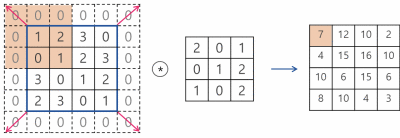

- 합성곱 신경망에서 합성곱 연산이란
    - 필터와 이미지의 로컬한 영역 간의 내적 연산을 한 것
    - 하나의 함수가 다른 함수와 얼마나 일치하는지의 의미로 사용
    - 이미지를 쭉 지나가면서 이미지의 부분 부분이 필터(filter, kernel)와 얼마나 일치하는지를 계산함
    - 필터 당 입력 이미지 전체에 대한 일치 정도를 feature map이라 함

- padding
    - 원본 배열의 양 끝에 빈 원소를 추가하는 것
    - 9x9 짜리 이미지에 3x3 필터를 4번 적용하면 1x1로 줄어들어 더이상 필터 적용 불가
        - 인공 신경망 입장에서는 은닉층의 개수에 제한이 생기는 것
        - 결과적으로 복잡한 패턴을 학습할 수 없음
        - => 합성곱 연산을 사용하되 더 깊은 신경망을 만들기 위해 패딩을 사용함
        - CNN에서는 주로 zero-padding이 이용됨
- stride
    - 미끄러지는 배열의 간격을 조절하는 것, 즉 필터의 이동량
- filter
    - 합성곱의 가중치
        - 각 레이어마다 필터가 존재하고, 필터는 여러 개 존재 가능
        - 이 책에서 필터 하나는 커널이라 표현하고, 필터를 통칭할 때는 가중치라고 표현할 것

### 합성곱 구현하기

In [0]:
!pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 34kB/s 
     |████████████████████████████████| 501kB 16.8MB/s 
     |████████████████████████████████| 4.3MB 40.6MB/s 


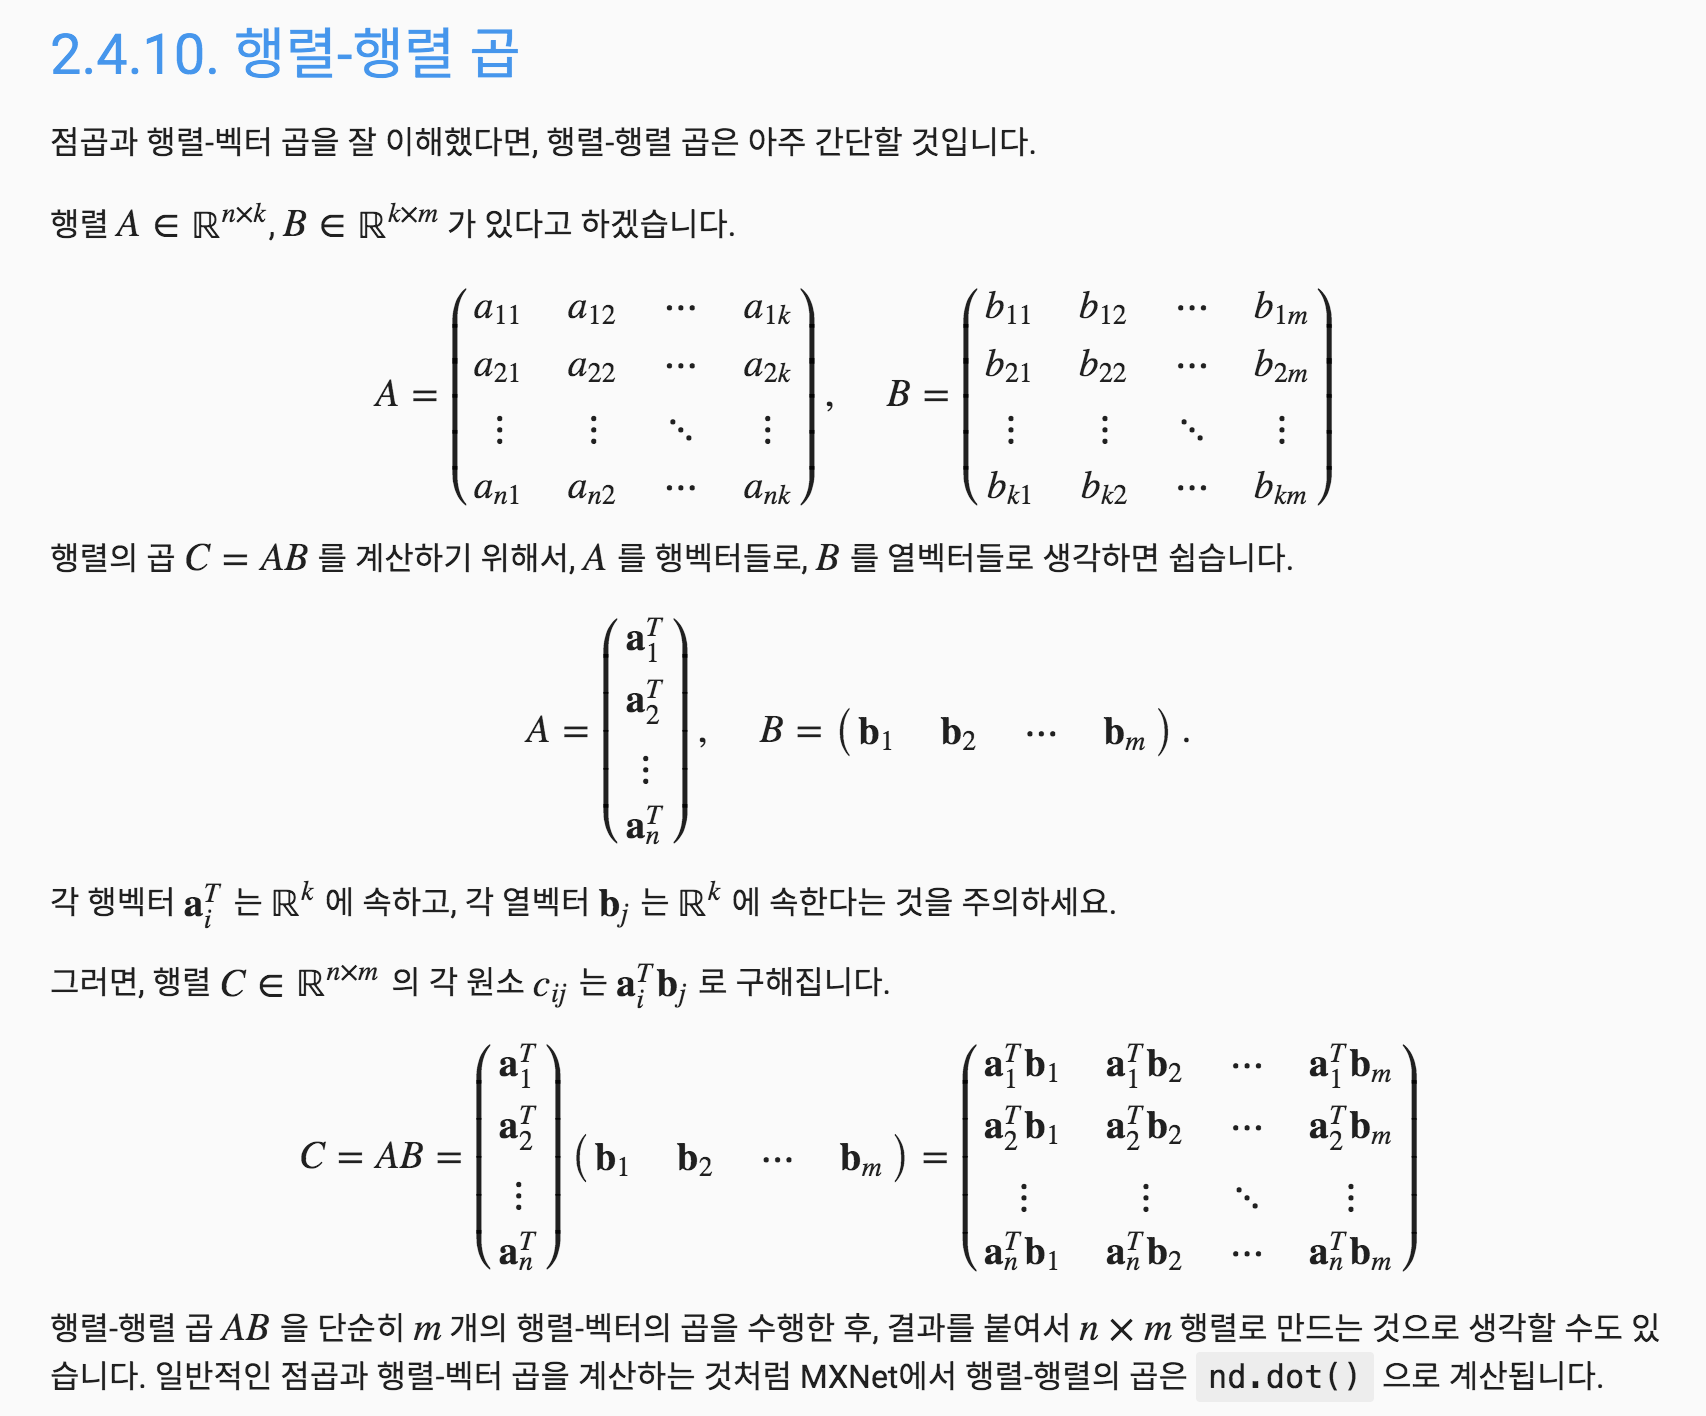

[참조_선형대수](https://ko.d2l.ai/chapter_crashcourse/linear-algebra.html)

In [0]:
#1.넘파이의 배열 정의하고 배열 하나 선택해 뒤집기
import numpy as np

w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w_r = np.flip(w) #w_r = w[::-1]
print(w_r)

[3 5 1 2]


In [0]:
#2.넘파이의 dot product로 합성곱 수행
for i in range(6):
    print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [0]:
#3.싸이파이로 합성곱 수행
from scipy.signal import convolve

convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

- 합성곱 신경망은 합성곱이 아닌 교차 상관을 사용함
- 합성곱 신경망이라는 이름은 관례에 따른 것
- 둘은 동일한 방법으로 연산이 진행됨
- '미끄러지는 배열을 뒤집지 않는 점'이 다름
    - 미끄러지는 배열은 '가중치 배열'을 의미
    - 가중치 배열은 무작위로 초기화 되어있으므로, 이를 뒤집어 적용하던지 뒤집지 않고 교차 상관을 적용하던지 작업은 동일함


In [0]:
#교차 상관은 싸이파이의 correlate() 함수 이용
from scipy.signal import correlate

correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

#### 패딩 종류

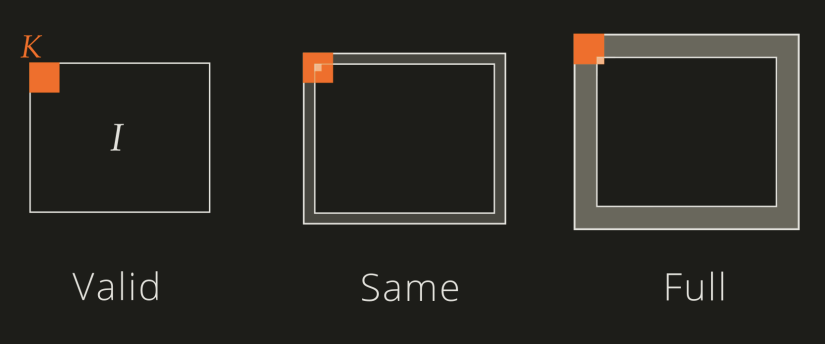

- 위의 valid padding은 원본 배열의 원소가 합성곱 연산에 참여하는 정도가 서로 다름
- 자세히는 원본 배열의 양 끝 원소의 연산 참여도가 낮음
- 귀퉁이가 잘리자나 !

In [0]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

- full padding은 원본 배열 원소의 연산 참여도를 동일하게 만듦
- 원본 배열의 양 끝에 가상의 원소 0을 추가함 (제로 패딩)

In [0]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

- same padding은 출력 배열의 길이를 원본 배열의 길이와 동일하게 만듦
- 2차원 배열에서 오른쪽과 아래쪽 모서리에 제로 패딩이 추가됨
- 가장 popular

### 2차원 배열에서 합성곱 수행
- 왼->오, 위->아래 (책 읽듯)

In [0]:
#2차원 배열의 합성곱은 싸이파이의 correlate2d() 함수 이용
from scipy.signal import correlate2d

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [0]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [0]:
#2차원 배열의 same padding
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

=> 원본 배열의 크기와 같은 출력 배열이 만들어짐


### 텐서플로로 합성곱 수행
- 원본 배열: 입력
- 미끄러지는 배열: 가중치
- 텐서 플로의 con2d() 함수는 입력으로 실수형, 4차원 배열을 기대함
    - 즉 입력 이미지에 대해 높이와 너비 외에 더 많은 차원이 필요

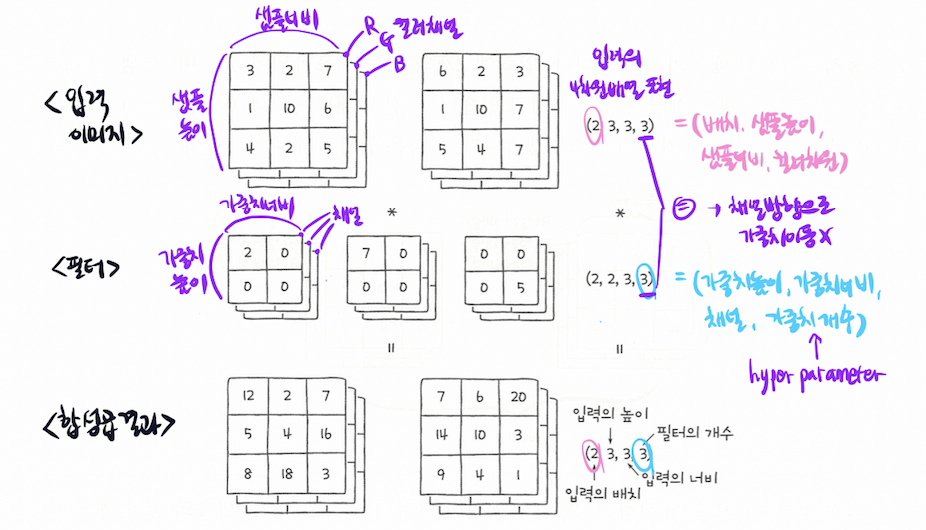

#### 입력의 구조
- 입력 (2, 3, 3, 3) = (**배치**, 샘플 높이, 샘플 너비, 컬러 채널)
- 가중치 (2, 2, 3, 3) = (가중치 높이, 가중치 너비, 채널, 가중치 개수)
- 입력과 가중치에 대한 합성곱의 수행 결과
    - (2, 3, 3, 3) = (**입력의 배치**, 입력의 높이, 입력의 너비, 채널)

In [0]:
#4차원 배열(2차원 배열을 reshape(), float 형으로 astype())로 합성곱 수행
import tensorflow as tf

x_4d = x.astype(np.float).reshape(1, 3, 3, 1) #배치와 컬러 채널 = 1
w_4d = w.reshape(2, 2, 1, 1) #컬러 채널과 가중치 개수 = 1

c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME') #패딩 옵션은 대문자 사용
c_out.numpy().reshape(3, 3) #conv2d()에서 반환된 Tensor 객체를 numpy array로 변환

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

- 합성곱 신경망을 이용해 다층신경망에서와 달리 입력을 펼치지 않고 그대로 사용 가능
- 가중치 배열의 크기가 훨씬 작게, 입력의 특징을 더 잘 찾게 되어 높은 성능 보임

# 풀링 연산
- 입력층 - 합성곱 층 - (특성맵) - 풀링층 - (특성맵)
- 풀링이란 특성 맵을 스캔하며 최대값을 고르거나 평균값을 계산하는 것 (**최대 풀링** / 평균 풀링)
- 평균 풀링은 합성곱층을 통과하는 특징들을 희석시킬 가능성이 있어, **가장 큰 특징을 유지하는 성질 가지는 최대 풀링이 이미지 분류 작업에서 선호됨 (Q3)**
    - MaxPooling은 nxn(Pool)을 중요한 정보(Max) 하나로 줄임
    - 선명한 정보만 남겨서 판단과 학습이 쉽고, 노이즈가 줄면서, 융통성도 확보
- 이 때 스트라이드는 풀링의 한 모서리 크기로 지정하여 풀링 영역이 겹쳐지지 않도록 스캔
- 풀링층을 통과한 특성맵이 각 영역을 대표하게 됨 (특성맵의 크기를 줄여 특성 맵의 한 요소가 입력의 더 넓은 영역을 바라보는 효과)
- 좀 넓게 봐야 알 수 있는, 복잡세포의 시각
- n이 홀수일 경우 패딩을 넣어 연산함


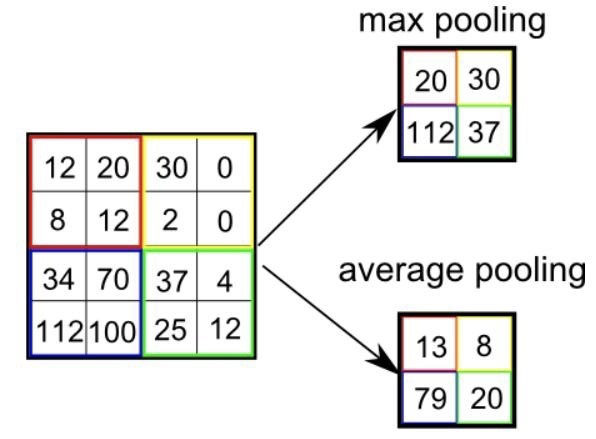

In [0]:
#최대 풀링과 평균 풀링 수행
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])
x = x.reshape(1, 4, 4, 1) #4x4 크기 배열 -> 1(배치)x4x4x1(채널) 크기 배열

p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2, 2)

array([[ 6,  8],
       [14, 16]])

- 풀링층에는 학습되는 가중치 없음
- 풀링은 배치 차원이나 채널 차원으로 적용 x
- 즉 풀링층을 통과하기 전후로 배치 크기와 채널 크기가 동일 (풀링은 각 샘플마다 또 각 채널마다 독립적으로 수행됨)

# 합성곱 신경망의 구조

### 렐루 함수
- 렐루함수는 주로 합성곱층에 적용되는 활성화 함수


In [0]:
#렐루 함수 구현
def relu(x):
    return np.maximum(x, 0)

In [0]:
#test
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

In [0]:
#텐서플로에서는 relu() 함수 이용
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

- 렐루함수의 도함수
    - x=0에서 첨점을 갖기 때문에 미분 불가 -> 기울기 정의x
    - 그러나 대부분의 딥러닝 패키지에서 x=0에서 도함수를 0으로 판단 (경험적)

### 합성곱 신경망에서 일어나는 일과 그 구조

### Concept

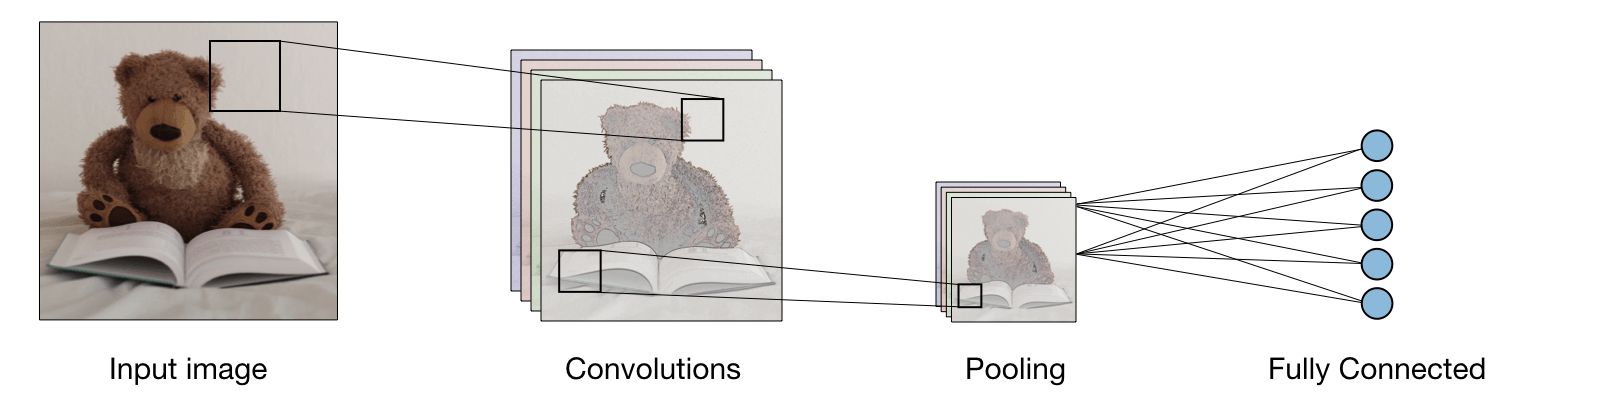

#### 1.  패턴들을 쌓아가며 점차 복잡한 패턴을 인식함
#### 2.  사이즈를 줄여가며, 더욱 추상화해감(maxpooling)
#### 3. 최종 판단은 Fully Connected Layer에 먹여서 하게 함

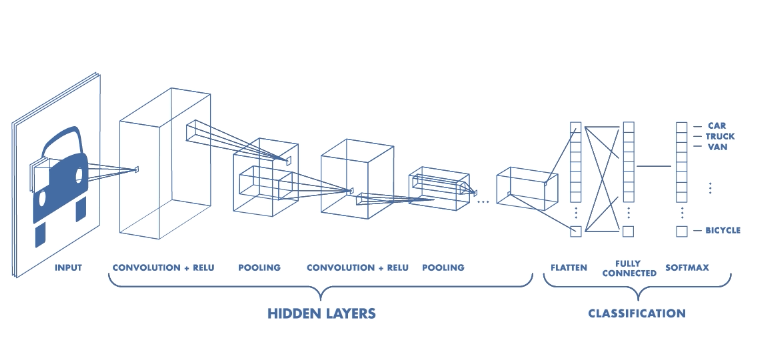

### **합성곱 층**에서 일어나는 일
- 합성곱 신경망은 이미지의 2차원 형태를 입력으로 그대로 사용
    - 이미지를 한 줄로 펼칠 필요가 없으므로 이미지 정보 손상x
    - 이미지는 채널이라는 차원을 하나 더 가짐 (특성 맵의 마지막 차원)
    - 이미지의 픽셀이 가진 색상을 표현하기 위해 필요한 정보 (RGB)

- 이미지의 모든 채널에 합성곱이 한 번에 적용되어야 하므로 커널의 마지막 차원은 입력 채널의 개수와 동일해야
    - 커널의 크기는 보통 3x3 or 5x5
    - 3x**3** 크기의 커널을 사용한다면 커널 배열의 크기는 3x3x**3**
    - 이미지가 4x4x**10**의 구조라면 커널 배열의 크기는 3x3x**10**
    - 즉 마지막 차원의 개수를 동일하게 맞춰야


- 입력 채널은 커널의 채널과 각각 합성곱을 수행 -> 합성곱의 전체 결과를 더하여 특성맵을 1조각 만듦(이미지의 특징 하나만 감지)
- 이미지의 여러 특성을 감지하려면 커널을 여러 개 사용해야

### **풀링층**에서 일어나는 일

- 합성곱 층을 통해 만들어진 특성 맵 -> ReLU 적용(활성화함수) -> 풀링 적용
- 특성맵의 크기가 줄어듦, 채널의 크기는 줄어들지 않음

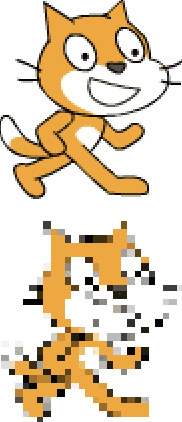

### **완전 연결 신경망**에 주입

- 합성곱층과 풀링층을 통과시켜 얻은 특성 맵은 일렬로 펼쳐 완전 연결층에 입력으로 주입 
- -> 완전 연결층의 출력이 출력층의 뉴런과 연결
- -> 합성곱층이 찾은 특성을 사용하여 최종 분류 단계(softmax함수 통과)를 수행